# Function and Derivative Plotting

This code creates visualizations that show:

- **Plots the function** (user input)
- **Plots the analytical derivative** (user input)  
- **Plots the numerical derivative** (using the definition of the derivative)
- **Plots the numerical slope** (using the limit definition of the slope)

The red dots represent numerical calculations using one of two methods:

#### When `plot_numerical_derivative = True`:
**Numerical Derivative** using the limit definition:
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$
#### When `plot_numerical_derivative = False`:
**Numerical Slopes** using the limit definition:
$$m = \lim_{x \to a} \frac{f(x) - f(a)}{x-a}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Set up symbolic variable
x = sp.Symbol('x')
plot_numerical_derivative = False
h = 0.001

In [2]:
def derivative_numerical(f, x_val):
    return (f(x_val + h) - f(x_val)) / h

def slope_numerical(f, x_val):
    a_val = x_val - h
    return (f(x_val)- f(a_val)) / (x_val - a_val)

def plot_f_fprime_dot(f_expr, f_prime_expr, x_start, x_stop, n_dots):

    # Convert the sympy expression to numpy function
    f = sp.lambdify(x, f_expr, 'numpy')
    f_prime = sp.lambdify(x,f_prime_expr, 'numpy')
    
    # Create the input x values
    x_vals = np.linspace(x_start, x_stop, 100)
    # Compute y values of the function
    y_vals = f(x_vals)
    # Compute y' values of the function
    y_prime_vals = f_prime(x_vals)
    
    
    # Plot the function
    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, y_vals, color='blue', label=f'f(x) = {f_expr}')

    # Plot the function's derivative
    plt.plot(x_vals, y_prime_vals, color='green', linestyle='--', label=f"f'(x) = {f_prime_expr}")
    
    # Calculate and plot numerical derivative or the numerical slope at specified values (red dots)
    x_dots = np.linspace(x_start, x_stop, n_dots)
    for i, x_dot in enumerate(x_dots):
        if (plot_numerical_derivative):
            dot = derivative_numerical(f, x_dot)
        else:
            dot = slope_numerical(f, x_dot)
        # Plot the dot
        plt.plot(x_dot, dot, 'ro', markersize=6)
    
    plt.grid(True, alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    


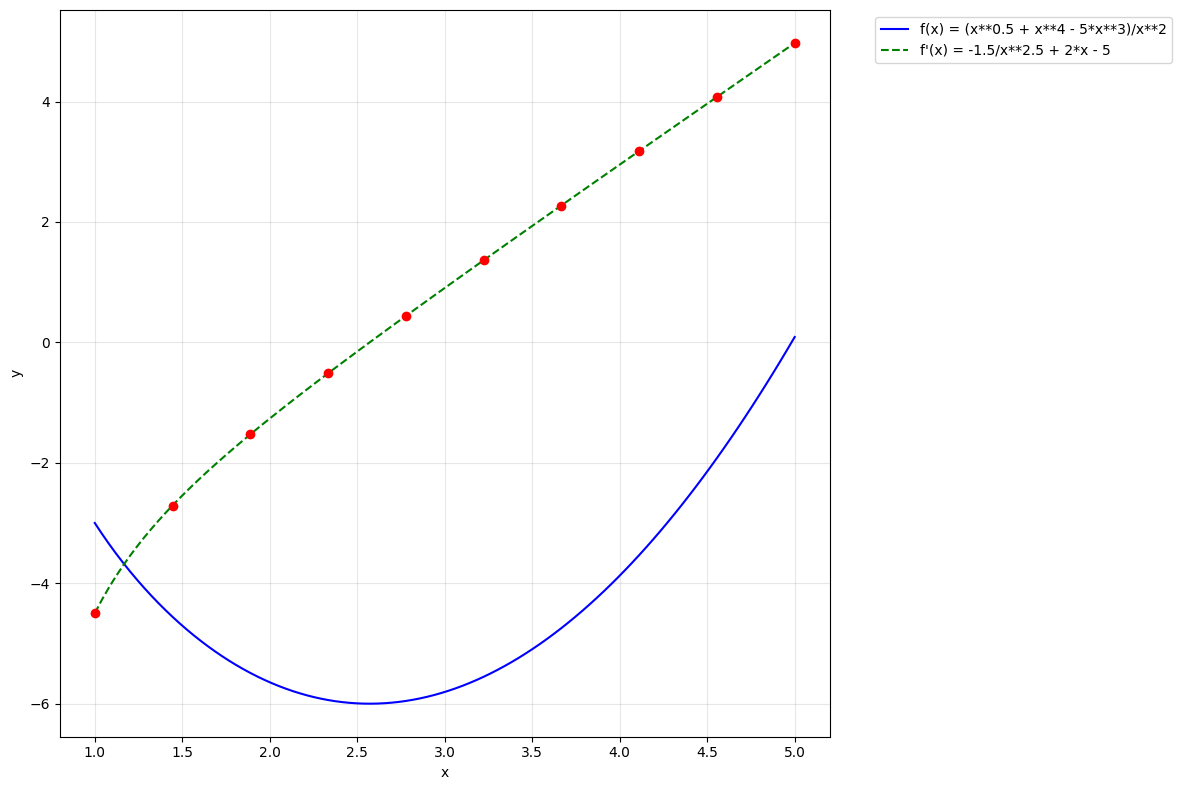

In [3]:
# Specify the domain (input) as x_start, x_stop
x_start = 1
x_stop = 5
# Specify the function (f) and its derivative. (f_prime)
f = (x**4 - 5*x**3 + x**0.5)/x**2
f_prime = 2*x - 5 - (3/2)*x**(-5/2)
# Specify the number of dots to display
n_dots= 10
# Pass this info to the plotting program
plot_f_fprime_dot(f, f_prime, x_start, x_stop, n_dots)

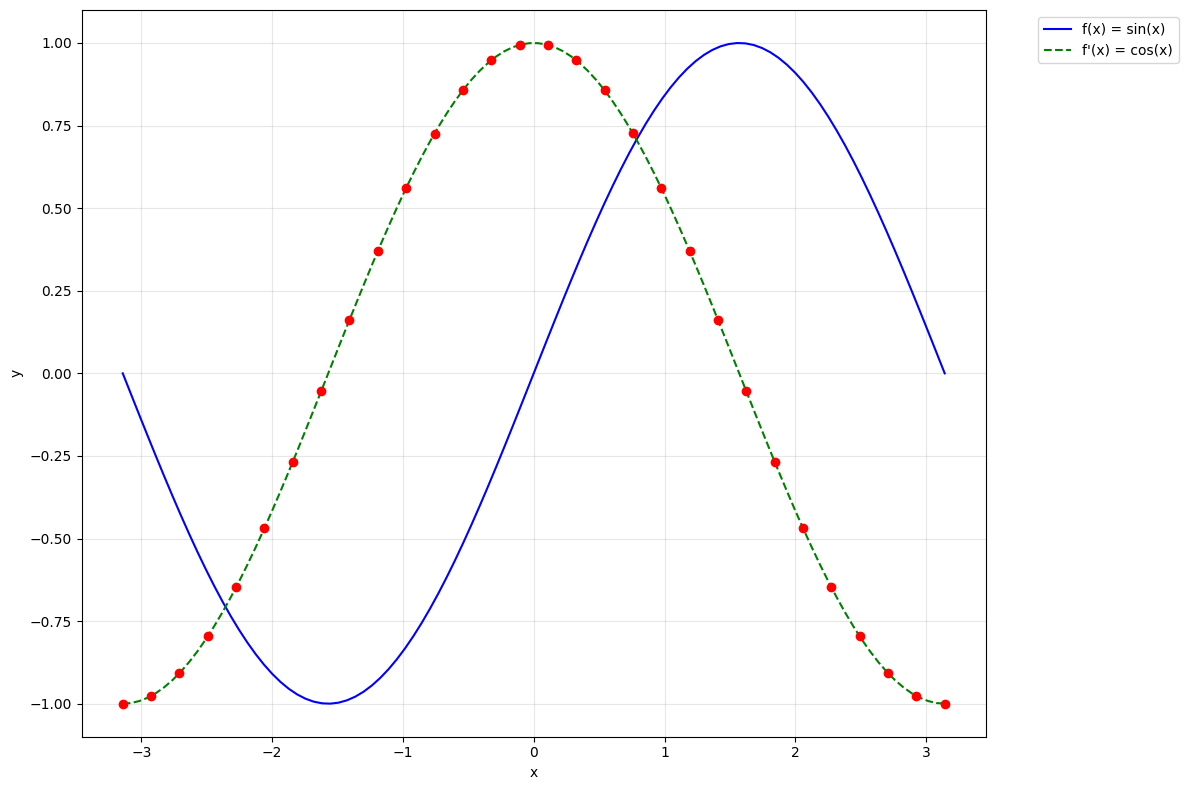

In [4]:
# Specify the domain (input) as x_start, x_stop
x_start = -np.pi
x_stop = np.pi
# Specify the function (f) and its derivative. (f_prime)
f = sp.sin(x)
f_prime = sp.cos(x)
# Specify the number of dots to display
n_dots= 30
# Pass this info to the plotting program
plot_f_fprime_dot(f, f_prime, x_start, x_stop, n_dots)